**Import libraries and load dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("./Mental Health Dataset.csv")


In [5]:
#Dataset Information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46842 entries, 0 to 46841
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                46842 non-null  object
 1   Gender                   46842 non-null  object
 2   Country                  46842 non-null  object
 3   Occupation               46842 non-null  object
 4   self_employed            45678 non-null  object
 5   family_history           46842 non-null  object
 6   treatment                46842 non-null  object
 7   Days_Indoors             46842 non-null  object
 8   Growing_Stress           46841 non-null  object
 9   Changes_Habits           46841 non-null  object
 10  Mental_Health_History    46841 non-null  object
 11  Mood_Swings              46841 non-null  object
 12  Coping_Struggles         46841 non-null  object
 13  Work_Interest            46841 non-null  object
 14  Social_Weakness  

In [6]:
#Capitalizing first letter of all columns
df.columns = df.columns.str.capitalize()
print(df.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'Self_employed',
       'Family_history', 'Treatment', 'Days_indoors', 'Growing_stress',
       'Changes_habits', 'Mental_health_history', 'Mood_swings',
       'Coping_struggles', 'Work_interest', 'Social_weakness',
       'Mental_health_interview', 'Care_options'],
      dtype='object')


In [7]:
#Drop Timestamp column
df.drop('Timestamp', axis=1, inplace=True)
df.head()

,Gender,Country,Occupation,Self_employed,Family_history,Treatment,Days_indoors,Growing_stress,Changes_habits,Mental_health_history,Mood_swings,Coping_struggles,Work_interest,Social_weakness,Mental_health_interview,Care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [8]:
#Check for null values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Gender                        0
Country                       0
Occupation                    0
Self_employed              1164
Family_history                0
Treatment                     0
Days_indoors                  0
Growing_stress                1
Changes_habits                1
Mental_health_history         1
Mood_swings                   1
Coping_struggles              1
Work_interest                 1
Social_weakness               1
Mental_health_interview       1
Care_options                  1
dtype: int64

# Exploratory Data Analysis

**Descriptive Stats**

In [9]:
desc_stats = df.describe()
desc_stats

,Gender,Country,Occupation,Self_employed,Family_history,Treatment,Days_indoors,Growing_stress,Changes_habits,Mental_health_history,Mood_swings,Coping_struggles,Work_interest,Social_weakness,Mental_health_interview,Care_options
count,46842,46842,46842,45678,46842,46842,46842,46841,46841,46841,46841,46841,46841,46841,46841,46841
unique,1,12,5,2,2,2,6,3,3,3,3,2,3,3,3,3
top,Female,United States,Housewife,No,Yes,Yes,31-60 days,Yes,Yes,Maybe,High,Yes,No,Maybe,No,Yes
freq,46842,31746,10285,42969,28258,32517,9922,18634,17317,17182,16456,24214,16577,16093,42195,18580


**Data Distribution**

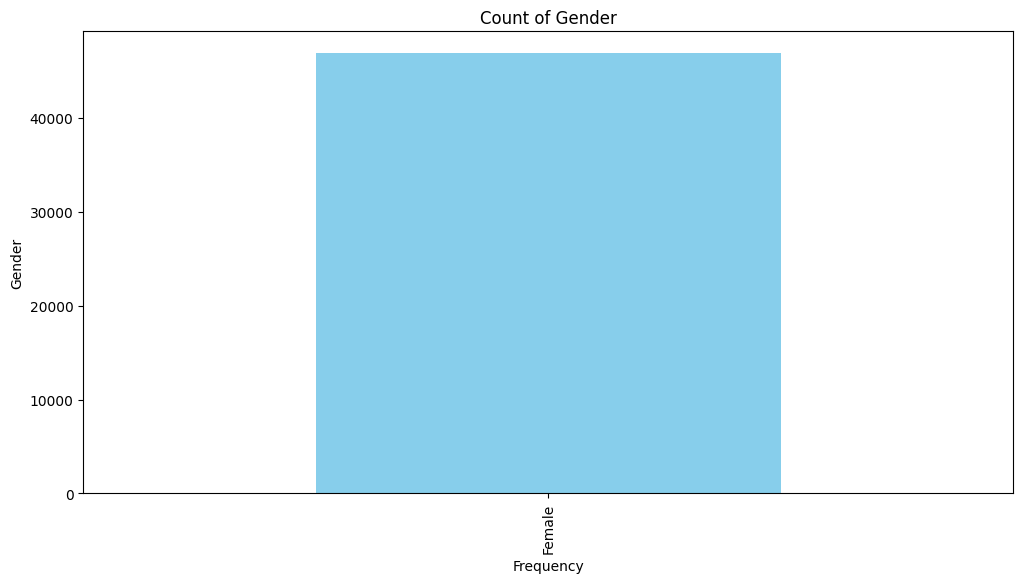

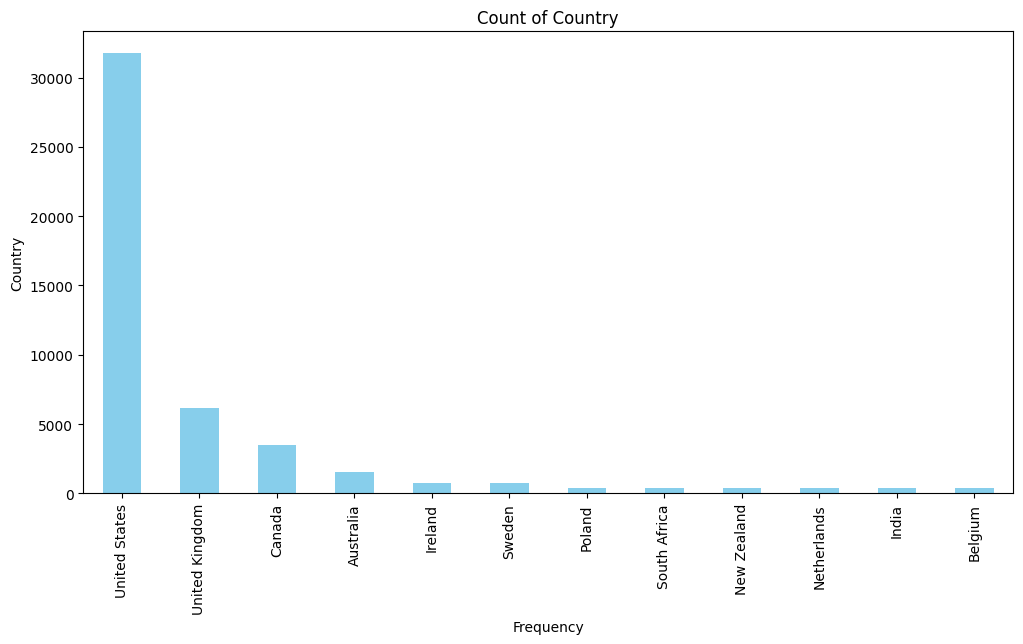

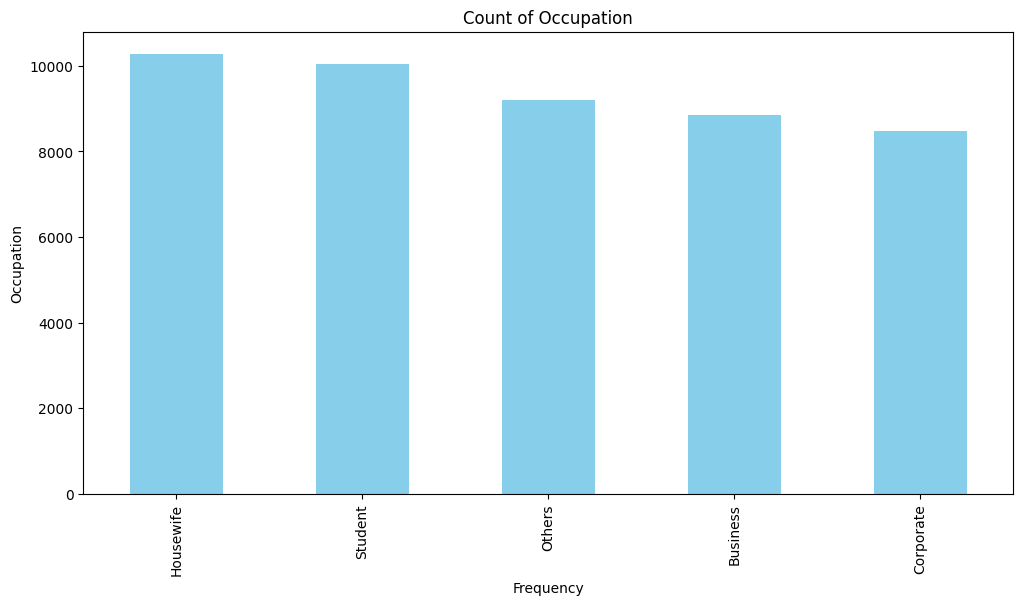

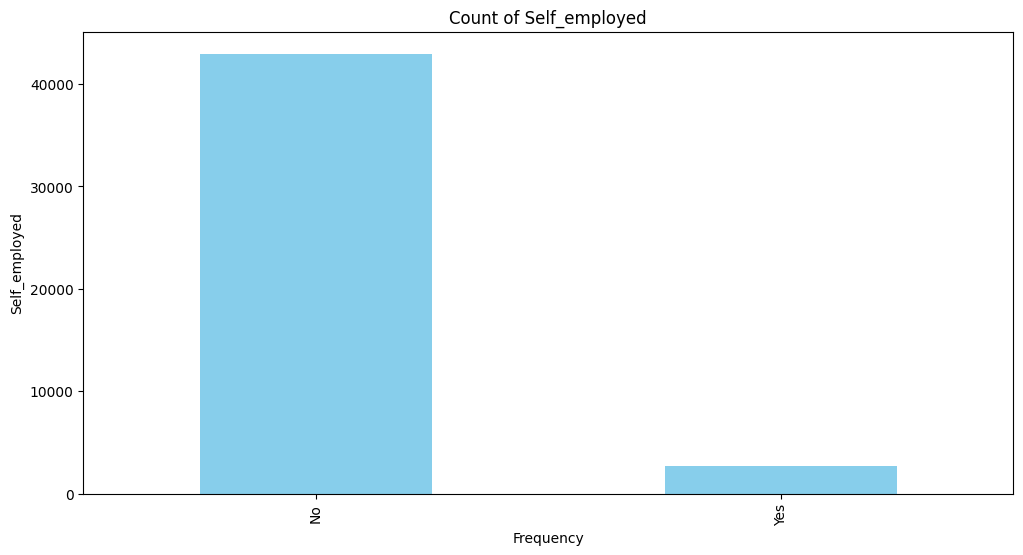

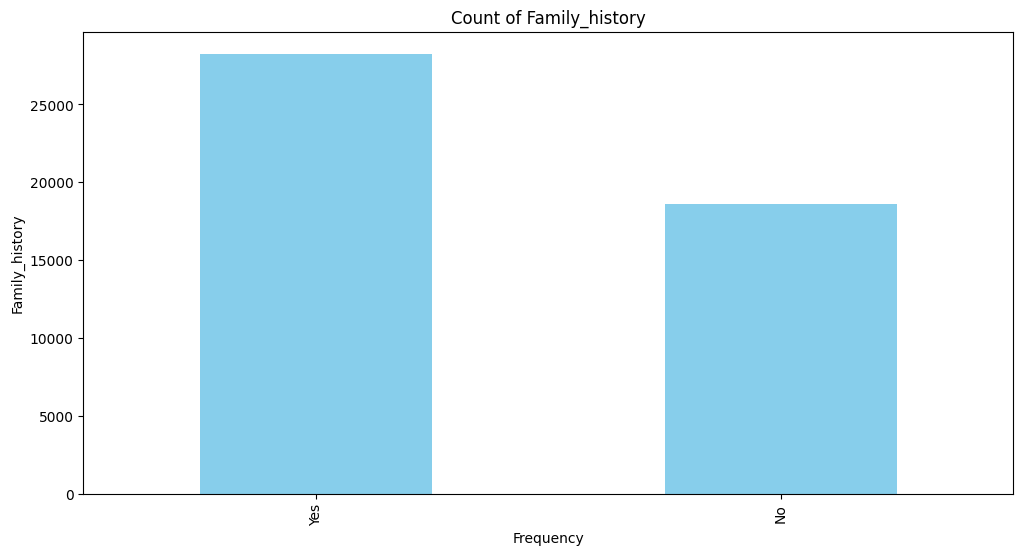

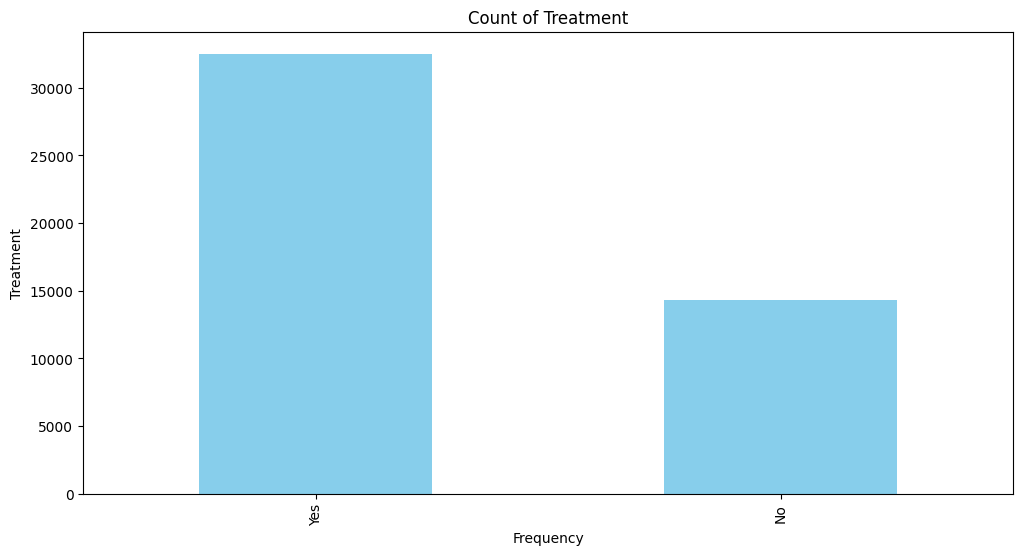

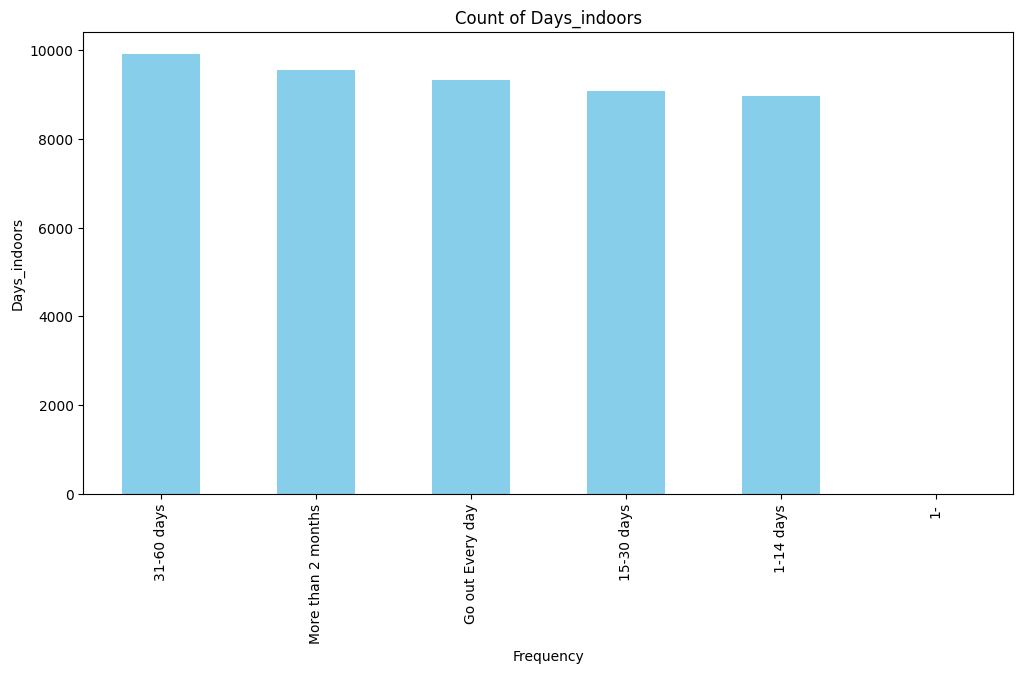

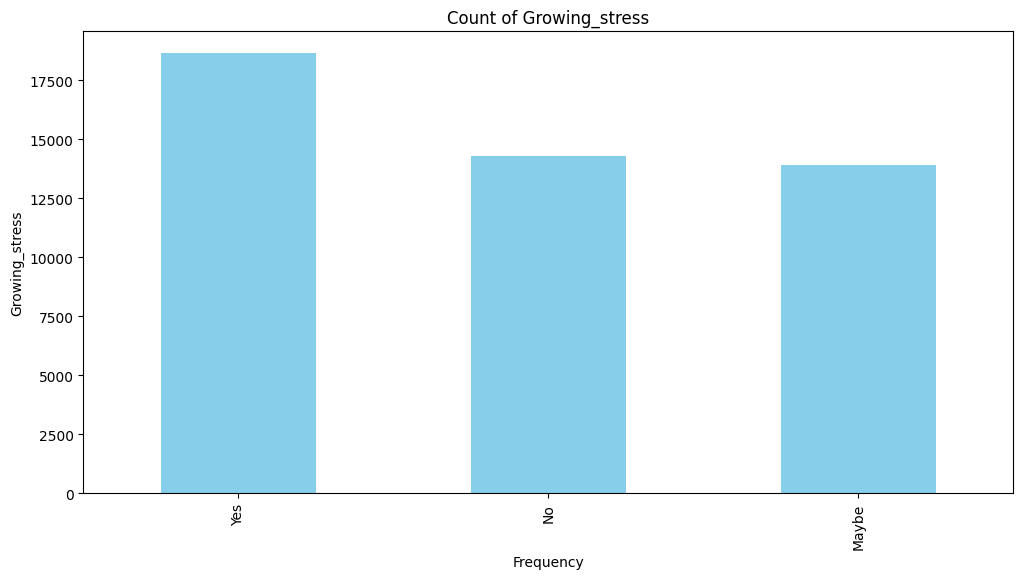

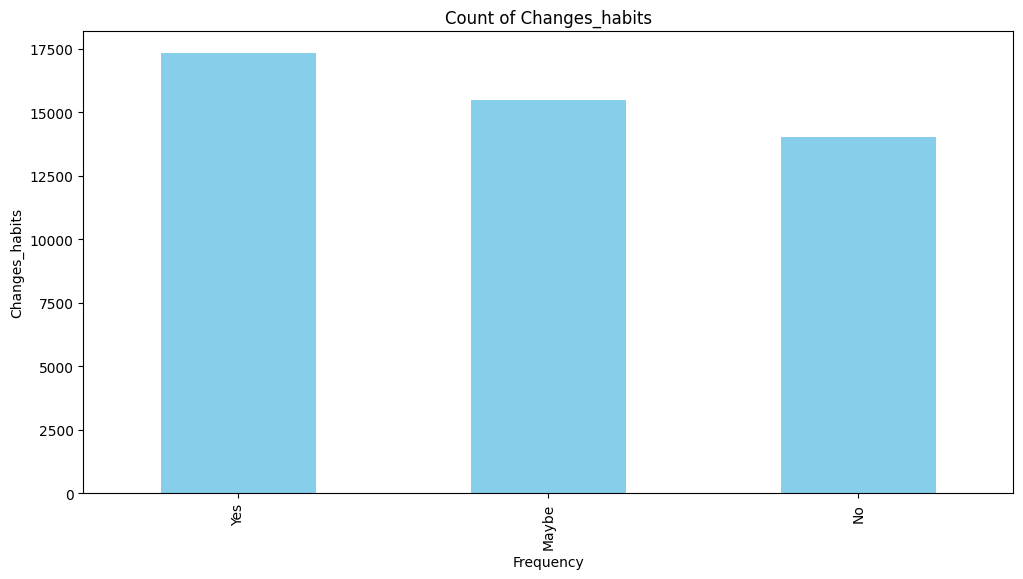

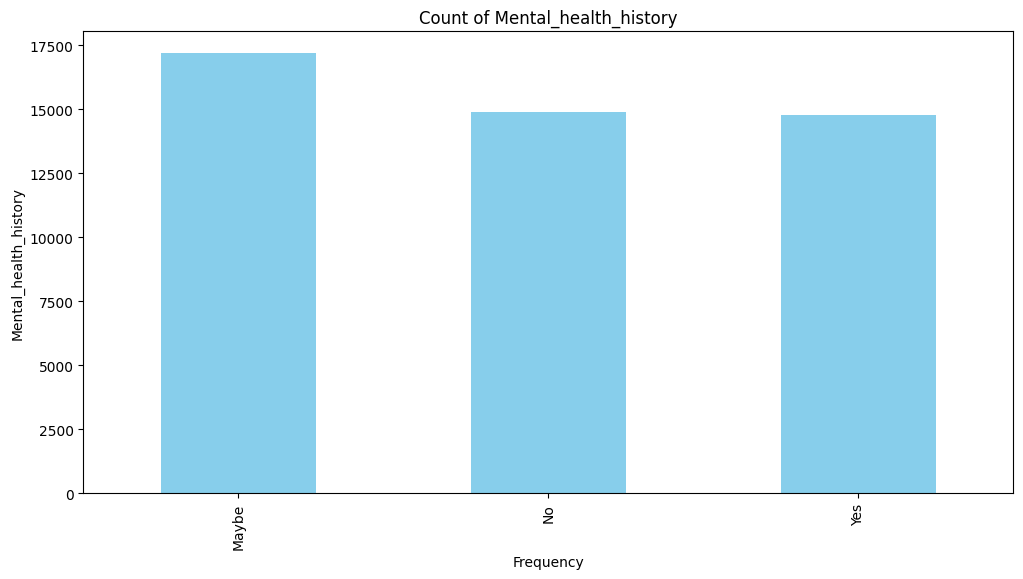

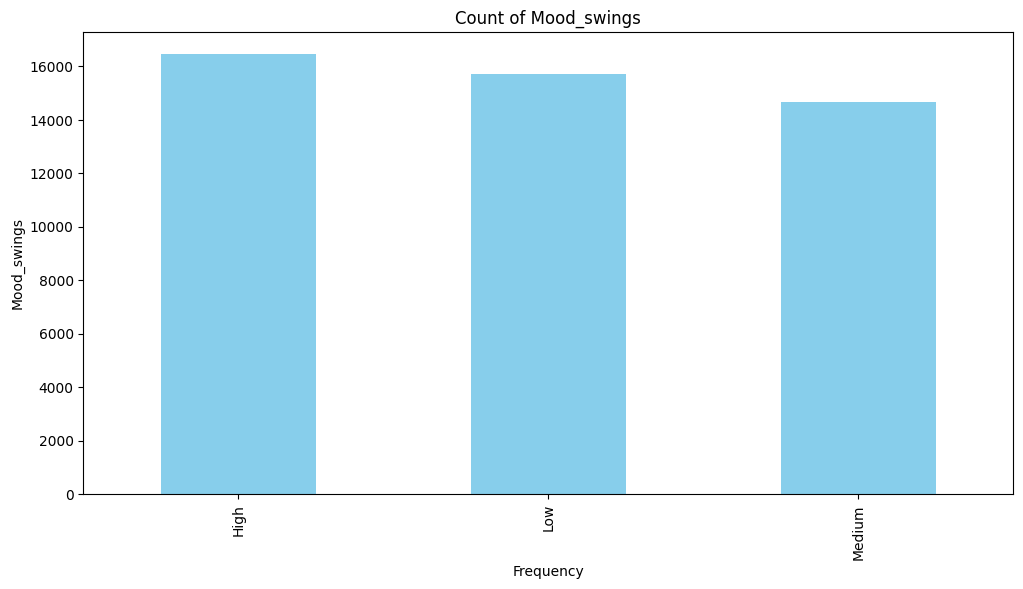

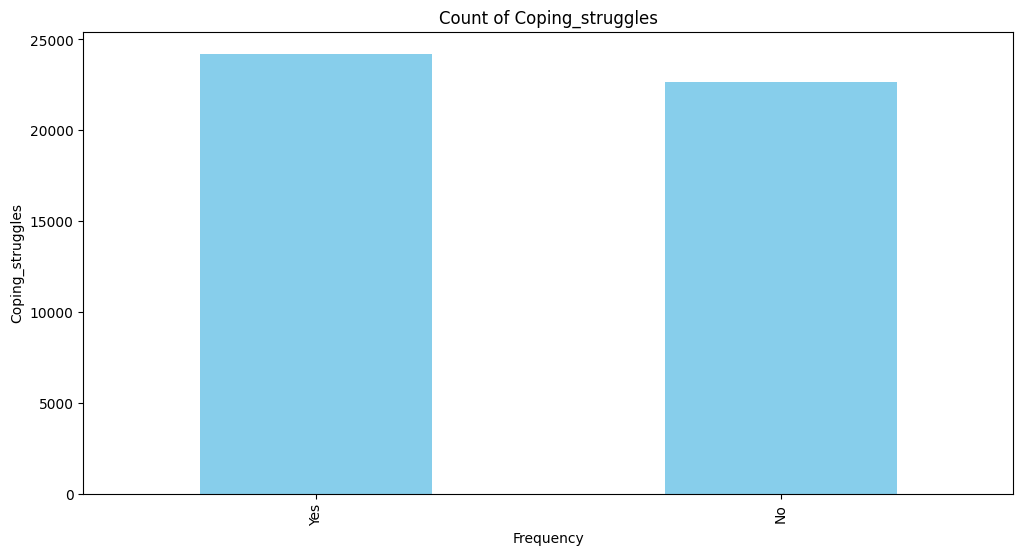

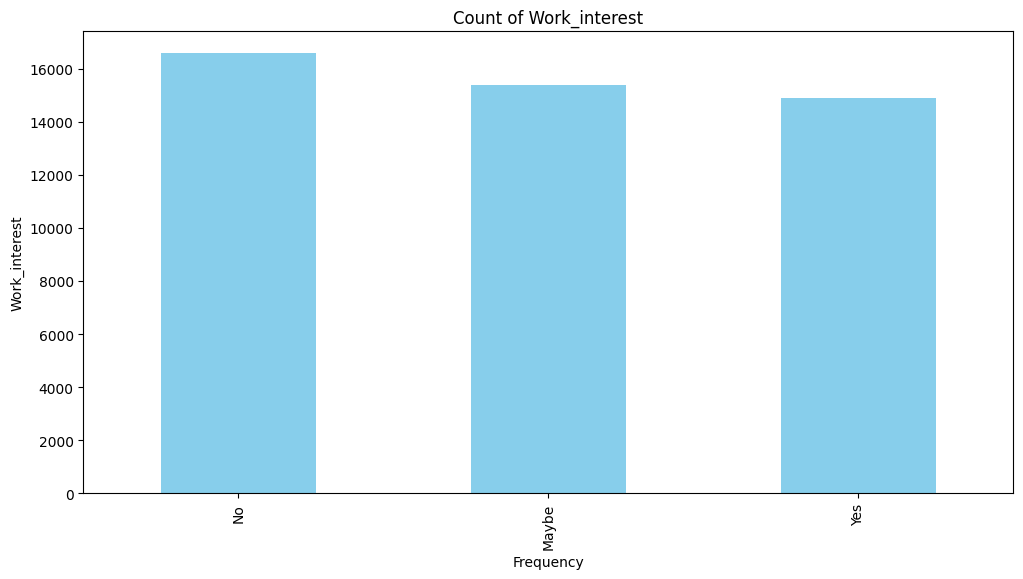

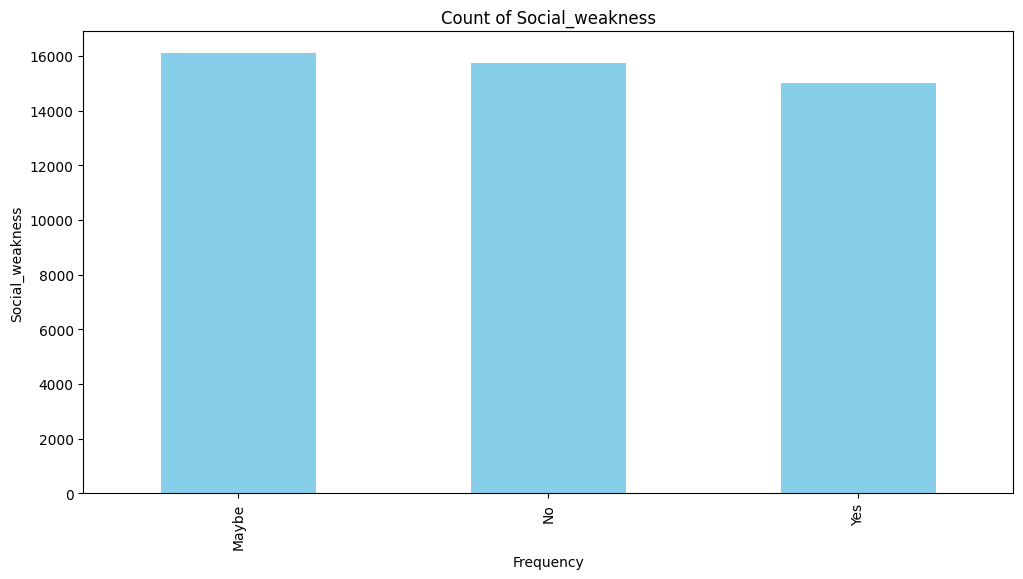

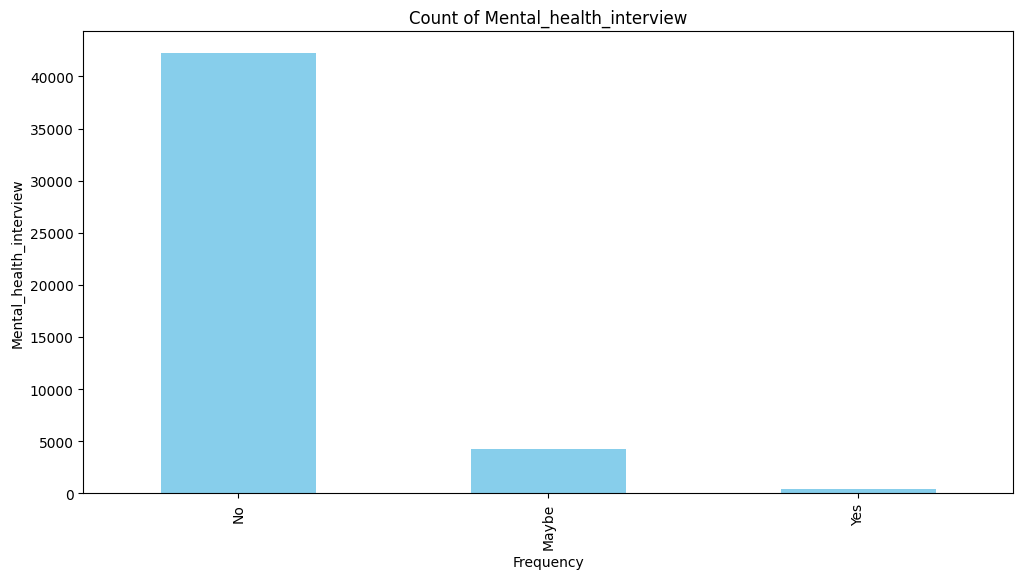

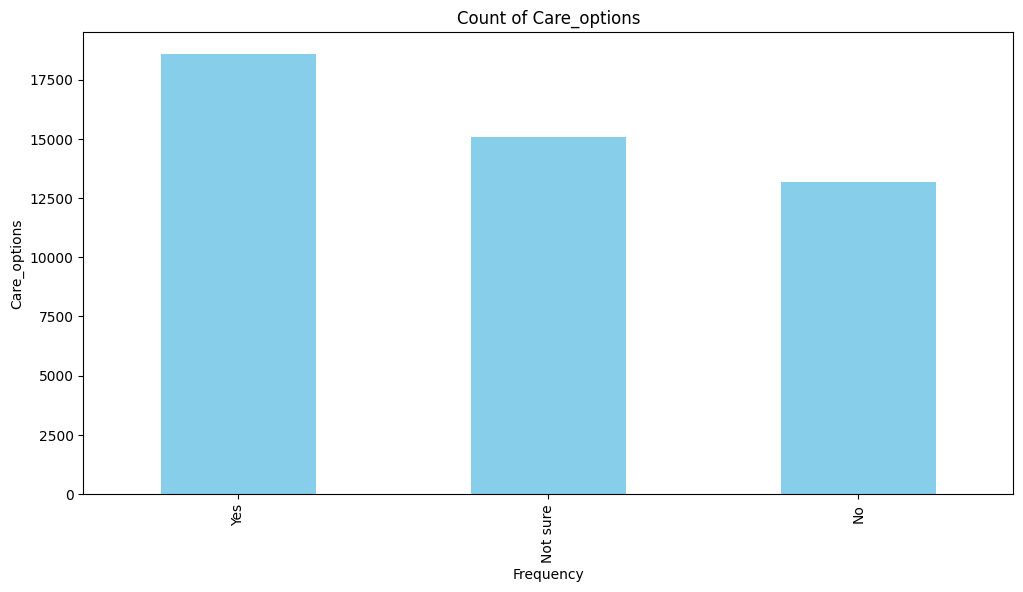

In [10]:
for column in df.columns:
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Count of {column}")
    plt.xlabel("Frequency")
    plt.ylabel(column)
    plt.show()

**Gender Analysis**

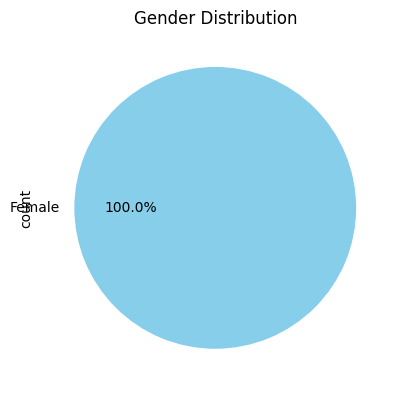

In [11]:
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

**Days Indoors Vs Mental Health History**

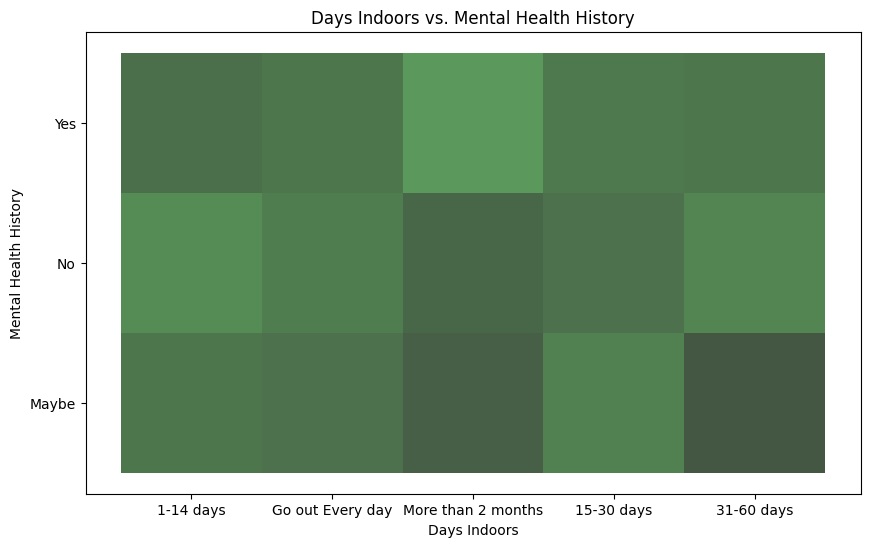

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Days_indoors', y='Mental_health_history', data=df, color='lightgreen')
plt.title("Days Indoors vs. Mental Health History")
plt.xlabel("Days Indoors")
plt.ylabel("Mental Health History")
plt.show()

**Mood Swings Vs Coping Struggles**

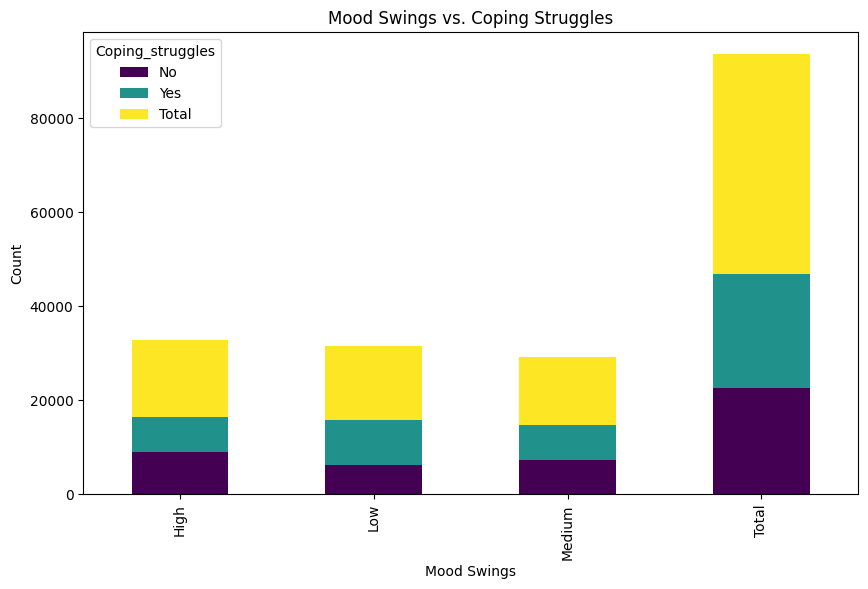

In [13]:
mood_coping_df = pd.crosstab(df['Mood_swings'], df['Coping_struggles'], margins= True, margins_name= 'Total')
mood_coping_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Mood Swings vs. Coping Struggles")
plt.xlabel("Mood Swings")
plt.ylabel("Count")
plt.show()

**Work Interest Vs Social Weakness**

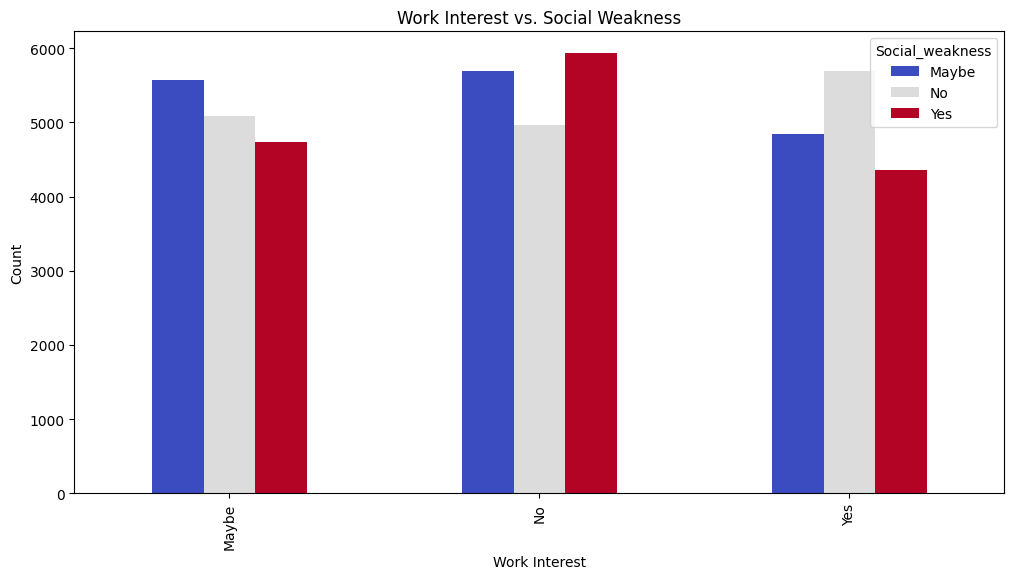

In [14]:
work_social_df = df.groupby(['Work_interest', 'Social_weakness']).size().unstack(fill_value=0)
work_social_df.plot(kind='bar', colormap='coolwarm', figsize=(12, 6))
plt.title("Work Interest vs. Social Weakness")
plt.xlabel("Work Interest")
plt.ylabel("Count")
plt.show()

**Care Options Analysis**

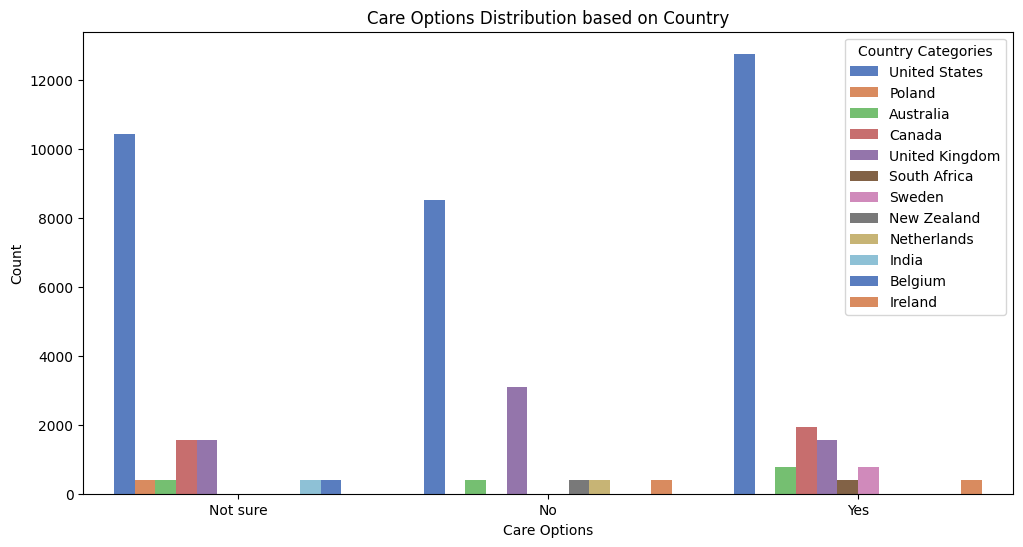

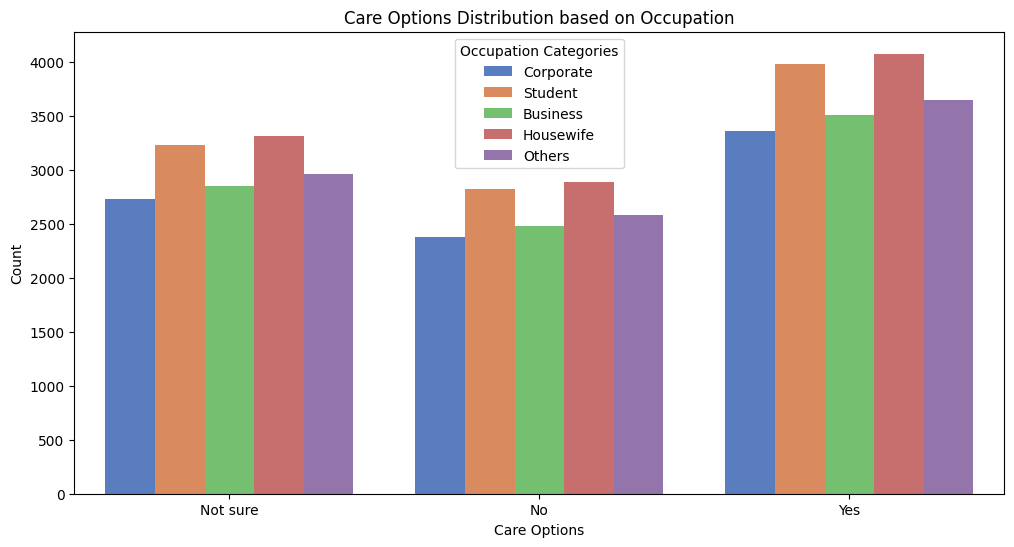

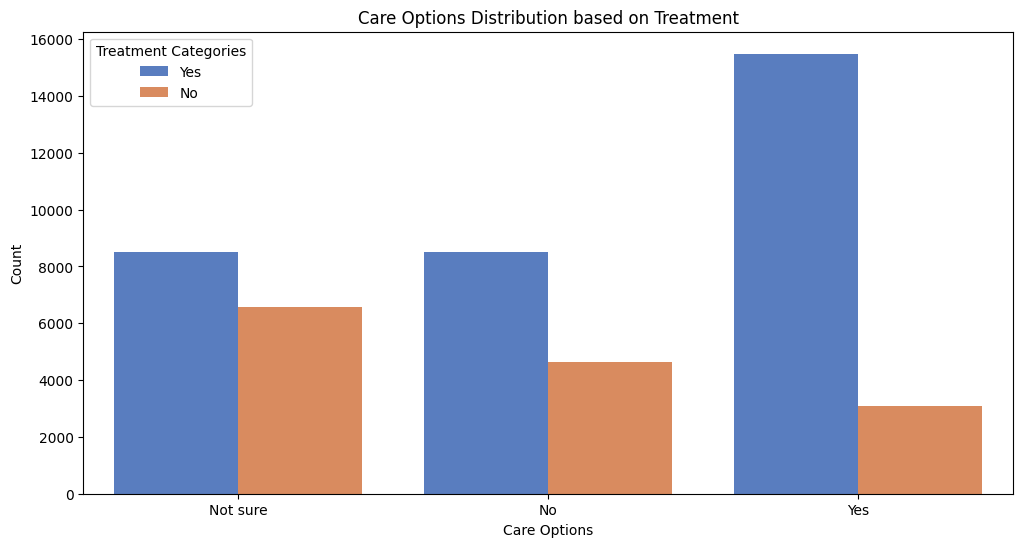

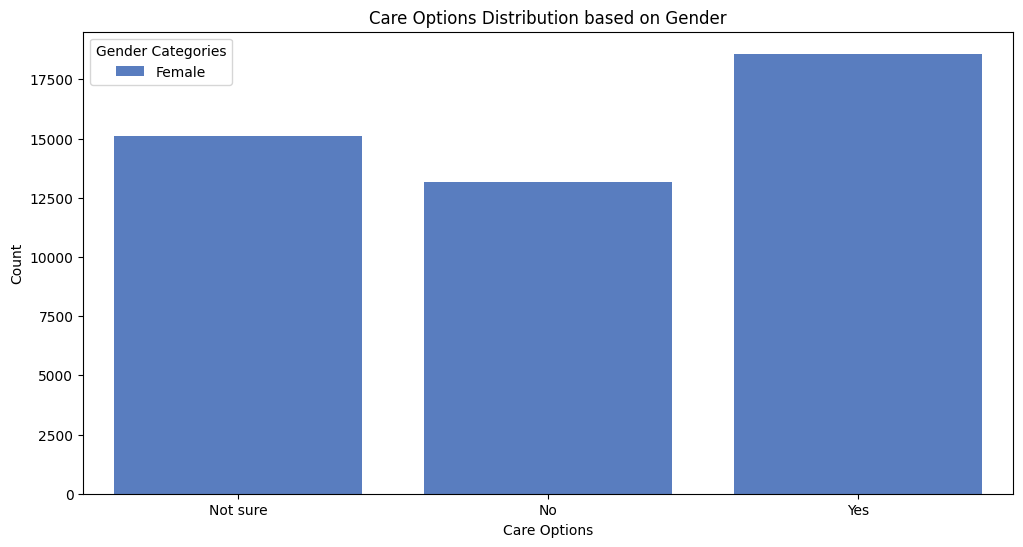

In [15]:
factors_to_analyze = ['Country', 'Occupation', 'Treatment', 'Gender']
for factor in factors_to_analyze:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Care_options', hue=factor, data=df, palette='muted')
    plt.title(f"Care Options Distribution based on {factor}")
    plt.xlabel("Care Options")
    plt.ylabel("Count")
    plt.legend(title=f'{factor} Categories')
    plt.show()

**Growing Stress Analysis**

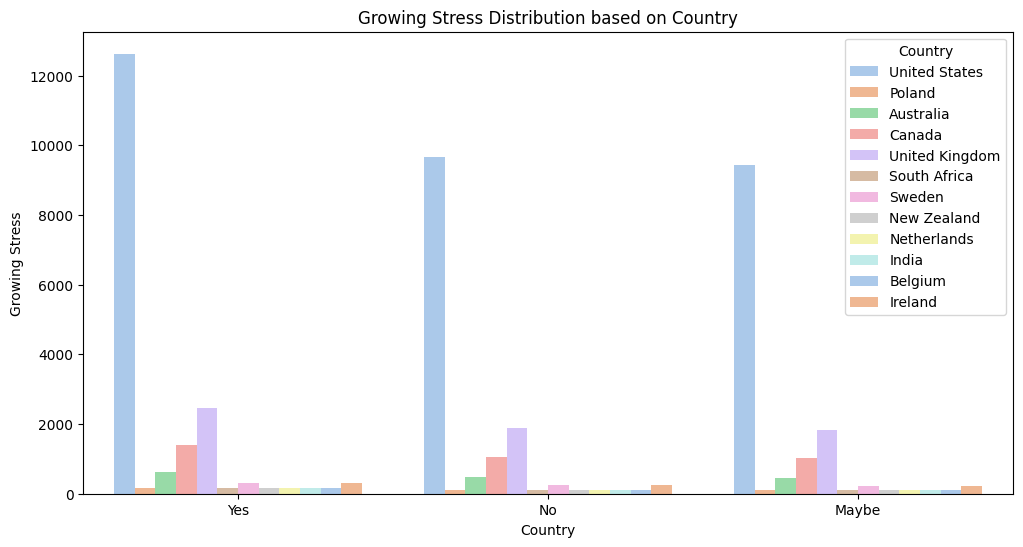

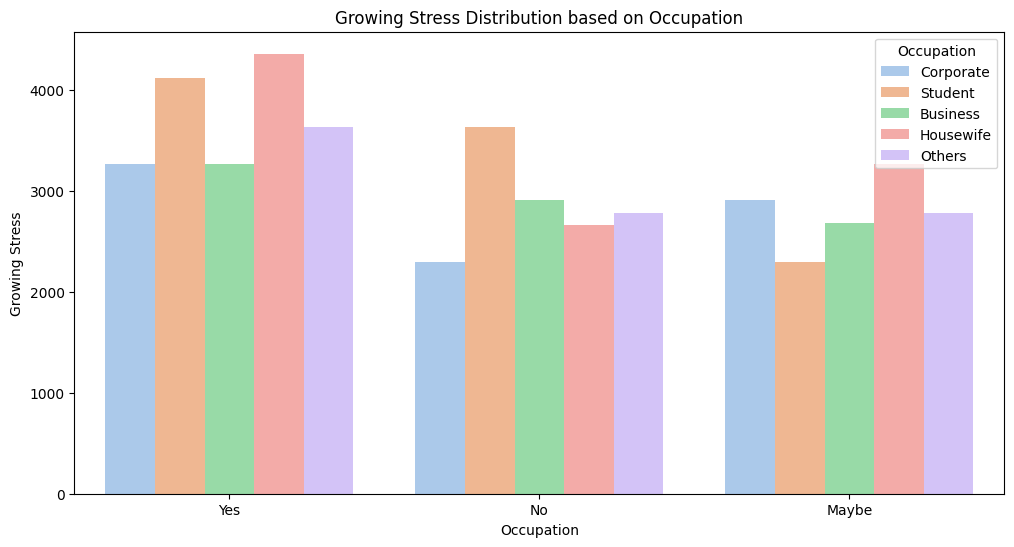

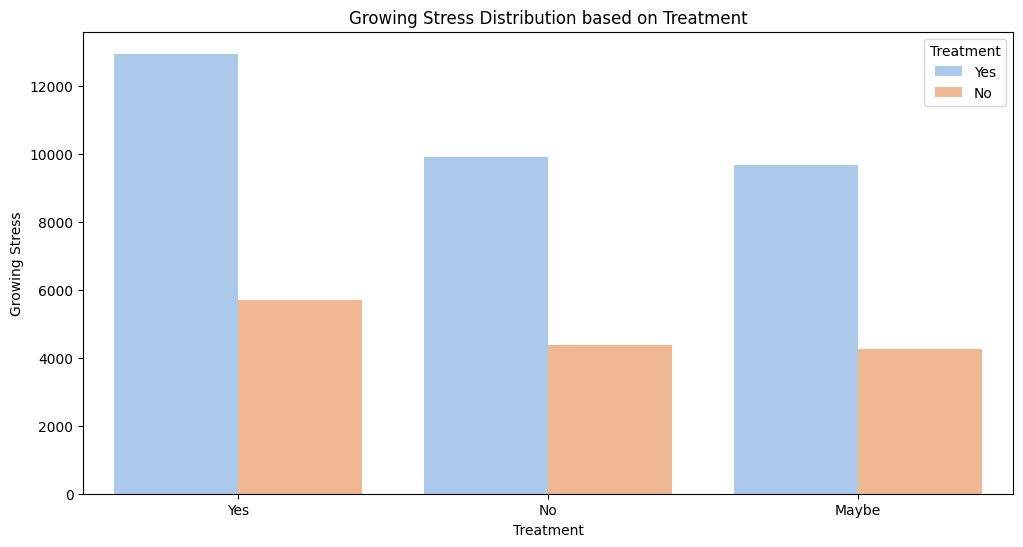

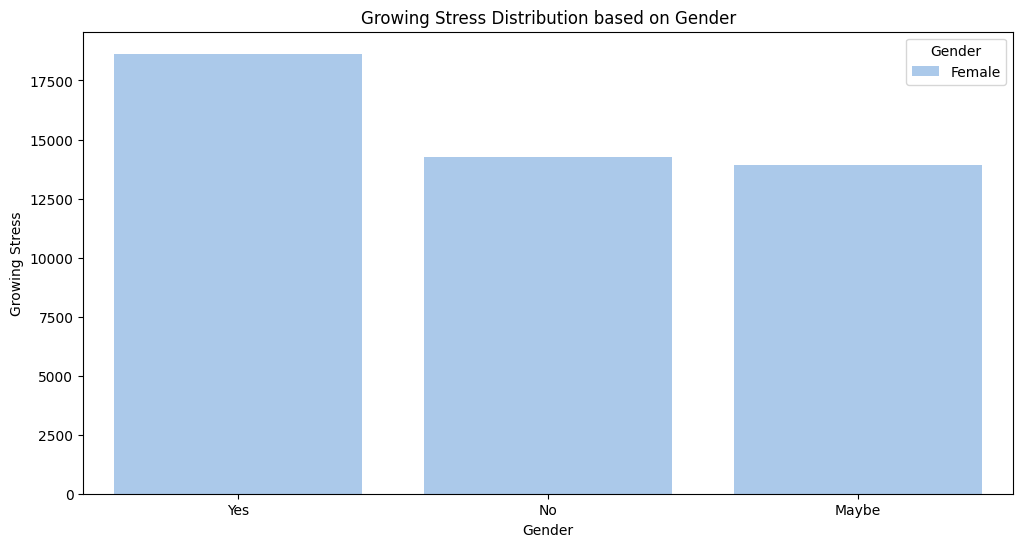

In [16]:
for factor in factors_to_analyze:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Growing_stress', hue=factor, data=df, palette='pastel')
    plt.title(f'Growing Stress Distribution based on {factor}')
    plt.xlabel(factor)
    plt.ylabel('Growing Stress')
    plt.show()